In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('runs/rewards/rewards_11.pk', 'rb') as f:
    rewards = pk.load(f)

<Figure size 600x400 with 0 Axes>

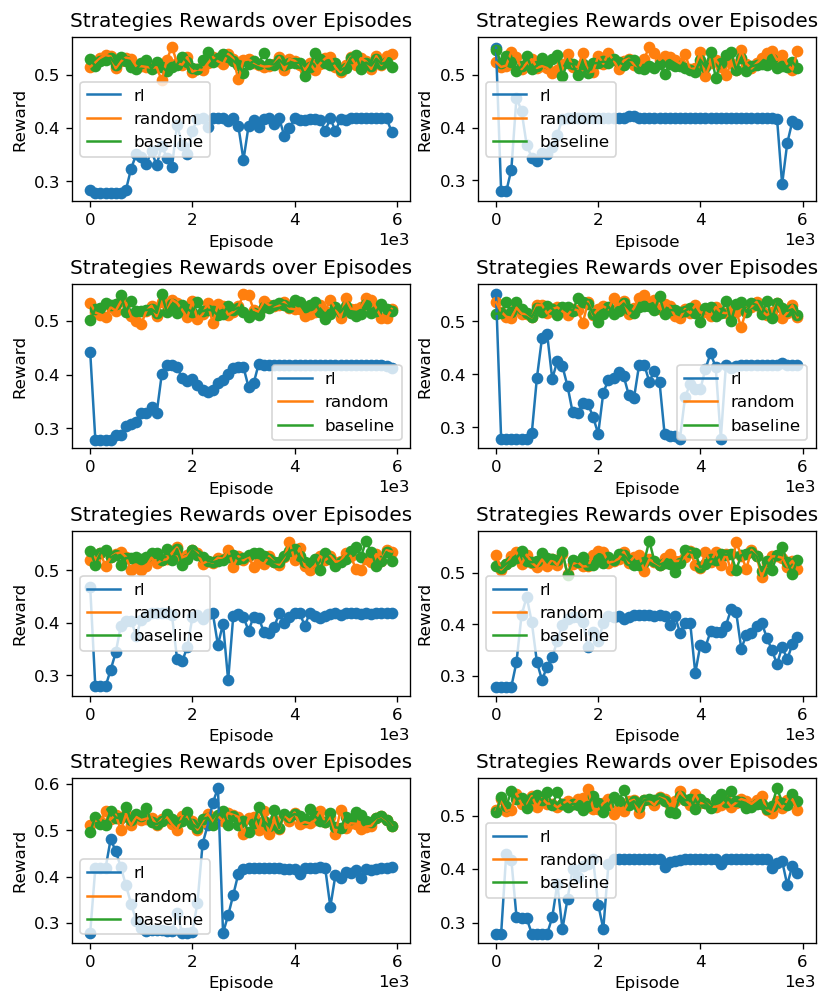

In [3]:
fig = plt.figure(dpi=100)

rows = 4
cols = 2
fig, ax = plt.subplots(rows,cols, dpi=120, figsize=(8,10))

for row_ in range(rows):
    for col_ in range(cols):
        i = cols*row_+col_
        with open(f'runs/rewards/rewards_{i}.pk', 'rb') as f:
            rewards = pk.load(f)
        for k in ['rl', 'random', 'baseline']:
            ax[row_,col_].plot(rewards['episode'], rewards[k], label=k)
            ax[row_,col_].scatter(rewards['episode'], rewards[k])
        ax[row_,col_].legend()
        ax[row_,col_].set_xlabel('Episode')
        ax[row_,col_].set_ylabel('Reward')
        ax[row_,col_].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax[row_,col_].set_title('Strategies Rewards over Episodes')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [4]:
import glob
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

rewards = {'rl':{}, 'baseline':{}, 'random':{}}
paths = glob.glob('runs/rewards/*.pk')
for path_ in paths:
    name = 'sim_' + path_.split('rewards_')[-1].split('.pk')[0]
    with open(path_, 'rb') as f:
        df = pd.DataFrame(pk.load(f))
        for k in ['rl', 'baseline', 'random']:
            rewards[k].update({name: df[k]})

rewards = {k:pd.DataFrame(v) for k, v in rewards.items()}

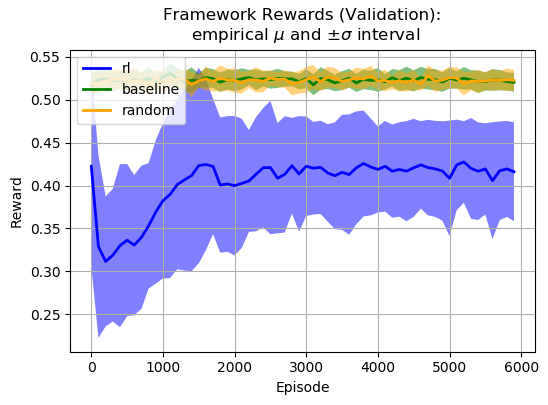

In [5]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards[strategy].mean(axis=1)
    sigma = rewards[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)